In this notebook, we work on the dataset regarding real estate prices in Egypt. We aim to create an accurate prediction of real estate prices by exploring the data and using different models (regression, lightGBM, ).

In [ ]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from scipy import stats
from scipy.stats import norm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

#from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
%pip install --upgrade category_encoders 
import category_encoders as ce
from yellowbrick.regressor import ResidualsPlot



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 183 kB/s 


Importing the dataset


In [ ]:
df = pd.read_csv("PricePredData.csv", encoding='cp1252') # Read CSV into dataframe

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Mortgage,Publish Date,Building Type,Address,Unnamed: 16
0,NaN,2,1,NaN,EG-2489969,42484,NaN,NaN,Seaview,95,NaN,NaN,NaN,NaN,Chalet,Ain Sokhna,NaN
1,5,3,2,SUPER_LUX,EG-3550112,33258,4036000,2026.0,Garden,132,Developer,Cash or Installments,CBE 3% Initiative CBE 8% Initiative Stores Fi...,08/20/2022,Chalet,Hyde Park North Coast North Coast Resorts,NaN
2,NaN,3,3,NaN,EG-3546954,27680,4390000,NaN,Seaview,200,Agent,Cash or Installments,NaN,08/18/2022,Chalet,Dbay Resort - Tatweer Misr North Coast Resorts,NaN
3,1,2,1,WITHOUT_FINISH,EG-2811128,29750,5536000,2019.0,Seaview,100,Developer,Installments,NaN,NaN,Chalet,North Coast,NaN
4,NaN,1,1,NaN,EG-3557456,24077,2975000,NaN,Seaview,57,Developer,Cash or Installments,NaN,08/24/2022,Chalet,North Coast Resort Ain Sokhna Resorts,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41605,NaN,4,NaN,SEMI_FINISHED,EG-3529359,8500,1950000,NaN,Side Street,250,Property Owner,Cash,NaN,NaN,Duplex,Mokattam,NaN
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,14231,2125000,2019.0,Side Street,130,Property Owner,Cash,NaN,11/9/2022,Apartment,Mokattam,NaN
41607,5,5,2,SEMI_FINISHED,EG-2816095,7500,1850000,2025.0,Main Street,201,Property Owner,Cash,NaN,NaN,Apartment,Mokattam,NaN
41608,6,3,3,SUPER_LUX,EG-3583570,8947,1507500,2022.0,Other,190,Developer,Cash or Installments,NaN,4/7/2022,Apartment,Mokattam,NaN


# DATA ANALYSIS

Analyze the dataset. 

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Mortgage,Publish Date,Building Type,Address,Unnamed: 16
0,NaN,2,1,NaN,EG-2489969,42484,NaN,NaN,Seaview,95,NaN,NaN,NaN,NaN,Chalet,Ain Sokhna,NaN
1,5,3,2,SUPER_LUX,EG-3550112,33258,4036000,2026.0,Garden,132,Developer,Cash or Installments,CBE 3% Initiative CBE 8% Initiative Stores Fi...,08/20/2022,Chalet,Hyde Park North Coast North Coast Resorts,NaN
2,NaN,3,3,NaN,EG-3546954,27680,4390000,NaN,Seaview,200,Agent,Cash or Installments,NaN,08/18/2022,Chalet,Dbay Resort - Tatweer Misr North Coast Resorts,NaN
3,1,2,1,WITHOUT_FINISH,EG-2811128,29750,5536000,2019.0,Seaview,100,Developer,Installments,NaN,NaN,Chalet,North Coast,NaN
4,NaN,1,1,NaN,EG-3557456,24077,2975000,NaN,Seaview,57,Developer,Cash or Installments,NaN,08/24/2022,Chalet,North Coast Resort Ain Sokhna Resorts,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41605,NaN,4,NaN,SEMI_FINISHED,EG-3529359,8500,1950000,NaN,Side Street,250,Property Owner,Cash,NaN,NaN,Duplex,Mokattam,NaN
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,14231,2125000,2019.0,Side Street,130,Property Owner,Cash,NaN,11/9/2022,Apartment,Mokattam,NaN
41607,5,5,2,SEMI_FINISHED,EG-2816095,7500,1850000,2025.0,Main Street,201,Property Owner,Cash,NaN,NaN,Apartment,Mokattam,NaN
41608,6,3,3,SUPER_LUX,EG-3583570,8947,1507500,2022.0,Other,190,Developer,Cash or Installments,NaN,4/7/2022,Apartment,Mokattam,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41610 entries, 0 to 41609
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Floor                      23651 non-null  object 
 1   Room                       40984 non-null  object 
 2   Baths                      40949 non-null  object 
 3   Finish Type                40433 non-null  object 
 4   Listing ID                 41606 non-null  object 
 5   Price Per Meter            41606 non-null  object 
 6   Price                      41539 non-null  object 
 7   Year Built / Deliver Year  39931 non-null  float64
 8   View                       39922 non-null  object 
 9   Area                       41606 non-null  object 
 10  Seller Role                41538 non-null  object 
 11  Payment Method             40470 non-null  object 
 12  Mortgage                   2435 non-null   object 
 13  Publish Date               38409 non-null  obj

Missing data

In [ ]:

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Unnamed: 16,40463,0.972435
Mortgage,39175,0.941480
Floor,17959,0.431603
Publish Date,3201,0.076929
View,1688,0.040567
Year Built / Deliver Year,1679,0.040351
Finish Type,1177,0.028286
Payment Method,1140,0.027397
Baths,661,0.015886
Room,626,0.015044


In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Mortgage,Publish Date,Building Type,Address,Unnamed: 16
0,NaN,2,1,NaN,EG-2489969,42484,NaN,NaN,Seaview,95,NaN,NaN,NaN,NaN,Chalet,Ain Sokhna,NaN
1,5,3,2,SUPER_LUX,EG-3550112,33258,4036000,2026.0,Garden,132,Developer,Cash or Installments,CBE 3% Initiative CBE 8% Initiative Stores Fi...,08/20/2022,Chalet,Hyde Park North Coast North Coast Resorts,NaN
2,NaN,3,3,NaN,EG-3546954,27680,4390000,NaN,Seaview,200,Agent,Cash or Installments,NaN,08/18/2022,Chalet,Dbay Resort - Tatweer Misr North Coast Resorts,NaN
3,1,2,1,WITHOUT_FINISH,EG-2811128,29750,5536000,2019.0,Seaview,100,Developer,Installments,NaN,NaN,Chalet,North Coast,NaN
4,NaN,1,1,NaN,EG-3557456,24077,2975000,NaN,Seaview,57,Developer,Cash or Installments,NaN,08/24/2022,Chalet,North Coast Resort Ain Sokhna Resorts,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41605,NaN,4,NaN,SEMI_FINISHED,EG-3529359,8500,1950000,NaN,Side Street,250,Property Owner,Cash,NaN,NaN,Duplex,Mokattam,NaN
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,14231,2125000,2019.0,Side Street,130,Property Owner,Cash,NaN,11/9/2022,Apartment,Mokattam,NaN
41607,5,5,2,SEMI_FINISHED,EG-2816095,7500,1850000,2025.0,Main Street,201,Property Owner,Cash,NaN,NaN,Apartment,Mokattam,NaN
41608,6,3,3,SUPER_LUX,EG-3583570,8947,1507500,2022.0,Other,190,Developer,Cash or Installments,NaN,4/7/2022,Apartment,Mokattam,NaN


In [ ]:
df['Area'].describe()

count     41606
unique      658
top         200
freq       1363
Name: Area, dtype: object

In [ ]:
df['Price Per Meter'].describe()

count     41606
unique     6839
top       10000
freq        468
Name: Price Per Meter, dtype: object

In [ ]:
df['Baths'].describe()

count     40949
unique       29
top           3
freq      14918
Name: Baths, dtype: object

In [ ]:
df['Room'].describe()

count     40984
unique       32
top           3
freq      18789
Name: Room, dtype: object

In [ ]:
df['Year Built / Deliver Year'].describe()

count    39931.000000
mean      2019.317923
std         13.723340
min         20.000000
25%       2017.000000
50%       2021.000000
75%       2023.000000
max       2030.000000
Name: Year Built / Deliver Year, dtype: float64

# Data Cleaning

In [ ]:
print(df['View'].unique())

['Seaview' 'Garden' 'Other' 'Main Street' 'Pool' 'Golf' 'Side Street' nan
 'Nile' 'Corner']


In [ ]:
print(df['Finish Type'].unique())

[nan 'SUPER_LUX' 'WITHOUT_FINISH' 'EXTRA_SUPER_LUX' 'LUX' 'SEMI_FINISHED']


In [ ]:
print(df['Seller Role'].unique())

[nan 'Developer' 'Agent' 'Property Owner']


In [ ]:
print(df['Building Type'].unique())

['Chalet' nan 'Villa' 'Twin House' 'Town House' 'Apartment' 'Duplex'
 'Penthouse' 'Roof' 'Studio' 'Administrative' 'Stores' 'Offices' 'Other'
 'Building']


In [ ]:
print(df['Payment Method'].unique())

[nan 'Cash or Installments' 'Installments' 'Cash']


Remove duplicates

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Mortgage,Publish Date,Building Type,Address,Unnamed: 16
0,NaN,2,1,NaN,EG-2489969,42484,NaN,NaN,Seaview,95,NaN,NaN,NaN,NaN,Chalet,Ain Sokhna,NaN
1,5,3,2,SUPER_LUX,EG-3550112,33258,4036000,2026.0,Garden,132,Developer,Cash or Installments,CBE 3% Initiative CBE 8% Initiative Stores Fi...,08/20/2022,Chalet,Hyde Park North Coast North Coast Resorts,NaN
2,NaN,3,3,NaN,EG-3546954,27680,4390000,NaN,Seaview,200,Agent,Cash or Installments,NaN,08/18/2022,Chalet,Dbay Resort - Tatweer Misr North Coast Resorts,NaN
3,1,2,1,WITHOUT_FINISH,EG-2811128,29750,5536000,2019.0,Seaview,100,Developer,Installments,NaN,NaN,Chalet,North Coast,NaN
4,NaN,1,1,NaN,EG-3557456,24077,2975000,NaN,Seaview,57,Developer,Cash or Installments,NaN,08/24/2022,Chalet,North Coast Resort Ain Sokhna Resorts,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41605,NaN,4,NaN,SEMI_FINISHED,EG-3529359,8500,1950000,NaN,Side Street,250,Property Owner,Cash,NaN,NaN,Duplex,Mokattam,NaN
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,14231,2125000,2019.0,Side Street,130,Property Owner,Cash,NaN,11/9/2022,Apartment,Mokattam,NaN
41607,5,5,2,SEMI_FINISHED,EG-2816095,7500,1850000,2025.0,Main Street,201,Property Owner,Cash,NaN,NaN,Apartment,Mokattam,NaN
41608,6,3,3,SUPER_LUX,EG-3583570,8947,1507500,2022.0,Other,190,Developer,Cash or Installments,NaN,4/7/2022,Apartment,Mokattam,NaN


In [ ]:
df = df.drop_duplicates(keep=False)

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Mortgage,Publish Date,Building Type,Address,Unnamed: 16
0,NaN,2,1,NaN,EG-2489969,42484,NaN,NaN,Seaview,95,NaN,NaN,NaN,NaN,Chalet,Ain Sokhna,NaN
1,5,3,2,SUPER_LUX,EG-3550112,33258,4036000,2026.0,Garden,132,Developer,Cash or Installments,CBE 3% Initiative CBE 8% Initiative Stores Fi...,08/20/2022,Chalet,Hyde Park North Coast North Coast Resorts,NaN
2,NaN,3,3,NaN,EG-3546954,27680,4390000,NaN,Seaview,200,Agent,Cash or Installments,NaN,08/18/2022,Chalet,Dbay Resort - Tatweer Misr North Coast Resorts,NaN
3,1,2,1,WITHOUT_FINISH,EG-2811128,29750,5536000,2019.0,Seaview,100,Developer,Installments,NaN,NaN,Chalet,North Coast,NaN
4,NaN,1,1,NaN,EG-3557456,24077,2975000,NaN,Seaview,57,Developer,Cash or Installments,NaN,08/24/2022,Chalet,North Coast Resort Ain Sokhna Resorts,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41605,NaN,4,NaN,SEMI_FINISHED,EG-3529359,8500,1950000,NaN,Side Street,250,Property Owner,Cash,NaN,NaN,Duplex,Mokattam,NaN
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,14231,2125000,2019.0,Side Street,130,Property Owner,Cash,NaN,11/9/2022,Apartment,Mokattam,NaN
41607,5,5,2,SEMI_FINISHED,EG-2816095,7500,1850000,2025.0,Main Street,201,Property Owner,Cash,NaN,NaN,Apartment,Mokattam,NaN
41608,6,3,3,SUPER_LUX,EG-3583570,8947,1507500,2022.0,Other,190,Developer,Cash or Installments,NaN,4/7/2022,Apartment,Mokattam,NaN


Removing Extra Columns

In [ ]:
df.drop('Unnamed: 16', axis=1, inplace=True)

In [ ]:
df.drop('Publish Date', axis=1, inplace=True)

In [ ]:
df.drop('Mortgage', axis=1, inplace=True)


In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Building Type,Address
0,NaN,2,1,NaN,EG-2489969,42484,NaN,NaN,Seaview,95,NaN,NaN,Chalet,Ain Sokhna
1,5,3,2,SUPER_LUX,EG-3550112,33258,4036000,2026.0,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts
2,NaN,3,3,NaN,EG-3546954,27680,4390000,NaN,Seaview,200,Agent,Cash or Installments,Chalet,Dbay Resort - Tatweer Misr North Coast Resorts
3,1,2,1,WITHOUT_FINISH,EG-2811128,29750,5536000,2019.0,Seaview,100,Developer,Installments,Chalet,North Coast
4,NaN,1,1,NaN,EG-3557456,24077,2975000,NaN,Seaview,57,Developer,Cash or Installments,Chalet,North Coast Resort Ain Sokhna Resorts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41605,NaN,4,NaN,SEMI_FINISHED,EG-3529359,8500,1950000,NaN,Side Street,250,Property Owner,Cash,Duplex,Mokattam
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,14231,2125000,2019.0,Side Street,130,Property Owner,Cash,Apartment,Mokattam
41607,5,5,2,SEMI_FINISHED,EG-2816095,7500,1850000,2025.0,Main Street,201,Property Owner,Cash,Apartment,Mokattam
41608,6,3,3,SUPER_LUX,EG-3583570,8947,1507500,2022.0,Other,190,Developer,Cash or Installments,Apartment,Mokattam


Filling missing values

In [ ]:
df['Floor']=df['Floor'].fillna('0')

Cleaning Area and removing outliers 

In [ ]:
df=df.drop(df.loc[df['Area'].isnull()].index)

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Building Type,Address
0,0,2,1,NaN,EG-2489969,42484,NaN,NaN,Seaview,95,NaN,NaN,Chalet,Ain Sokhna
1,5,3,2,SUPER_LUX,EG-3550112,33258,4036000,2026.0,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts
2,0,3,3,NaN,EG-3546954,27680,4390000,NaN,Seaview,200,Agent,Cash or Installments,Chalet,Dbay Resort - Tatweer Misr North Coast Resorts
3,1,2,1,WITHOUT_FINISH,EG-2811128,29750,5536000,2019.0,Seaview,100,Developer,Installments,Chalet,North Coast
4,0,1,1,NaN,EG-3557456,24077,2975000,NaN,Seaview,57,Developer,Cash or Installments,Chalet,North Coast Resort Ain Sokhna Resorts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41605,0,4,NaN,SEMI_FINISHED,EG-3529359,8500,1950000,NaN,Side Street,250,Property Owner,Cash,Duplex,Mokattam
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,14231,2125000,2019.0,Side Street,130,Property Owner,Cash,Apartment,Mokattam
41607,5,5,2,SEMI_FINISHED,EG-2816095,7500,1850000,2025.0,Main Street,201,Property Owner,Cash,Apartment,Mokattam
41608,6,3,3,SUPER_LUX,EG-3583570,8947,1507500,2022.0,Other,190,Developer,Cash or Installments,Apartment,Mokattam


In [ ]:
df['Area'].dtype

print(df['Area'].unique())


['95' '132' '200' '100' '57' '97' '135' '90' '125' '75' '137' '193' '65'
 '45' '80' '85' '108' '123' '120' '96' '55' '110' '105' '50' '165' '115'
 '60' '600' '92' '145' '27' '180' '156' '70' '160' '62' '260' '150' '274'
 '46' '30' '220' '88' '48' '91' '101' '67' '68' '86' '69' '72' '122' '162'
 '118' '81' '130' '112' '140' '190' '182' '102' '340' '170' '172' '79'
 '198' '412' '139' '161' '375' '147' '40' '218' '155' '378' '256' '288'
 '215' '425' '280' '300' '320' '305' '1002' '424' '514' '167' '387' '327'
 '234' '248' '224' '247' '394' '450' '380' '251' '230' '325' '210' '2200'
 '365' '343' '194' '332' '276' '265' '448' '336' '319' '420' '386' '237'
 '231' '166' '1200' '735' '205' '1500' '243' '262' '240' '1324' '369' '255'
 '175' '289' '257' '312' '225' '393' '185' '534' '650' '253' '254' '227'
 '1050' '285' '431' '311' '261' '648' '400' '500' '820' '317' '250' '313'
 '195' '10500' '1047' '168' '366' '397' '196' '817' '385' '1750' '275'
 '2280' '345' '310' '279' '370' '235' '228' '48

In [ ]:
df.loc[ df['Area'] == ' three hundred fifty', 'Area'] = '350'
df.loc[ df['Area'] == 'three hundred fifty', 'Area'] = '350'

print(df['Area'].unique())

['95' '132' '200' '100' '57' '97' '135' '90' '125' '75' '137' '193' '65'
 '45' '80' '85' '108' '123' '120' '96' '55' '110' '105' '50' '165' '115'
 '60' '600' '92' '145' '27' '180' '156' '70' '160' '62' '260' '150' '274'
 '46' '30' '220' '88' '48' '91' '101' '67' '68' '86' '69' '72' '122' '162'
 '118' '81' '130' '112' '140' '190' '182' '102' '340' '170' '172' '79'
 '198' '412' '139' '161' '375' '147' '40' '218' '155' '378' '256' '288'
 '215' '425' '280' '300' '320' '305' '1002' '424' '514' '167' '387' '327'
 '234' '248' '224' '247' '394' '450' '380' '251' '230' '325' '210' '2200'
 '365' '343' '194' '332' '276' '265' '448' '336' '319' '420' '386' '237'
 '231' '166' '1200' '735' '205' '1500' '243' '262' '240' '1324' '369' '255'
 '175' '289' '257' '312' '225' '393' '185' '534' '650' '253' '254' '227'
 '1050' '285' '431' '311' '261' '648' '400' '500' '820' '317' '250' '313'
 '195' '10500' '1047' '168' '366' '397' '196' '817' '385' '1750' '275'
 '2280' '345' '310' '279' '370' '235' '228' '48

In [ ]:
df.loc[df['Area'].isna()]


df['Area'] = df['Area'].astype(int)

In [ ]:
df['Area'].dtype

dtype('int64')

Removing outliers from area

In [ ]:
df = df[df['Area']<1500]
df = df[df['Area']>25]

In [ ]:
df['Area'].dtype

print(df['Area'].unique())

df.loc[df['Area'].isna()]

[  95  132  200  100   57   97  135   90  125   75  137  193   65   45   80
   85  108  123  120   96   55  110  105   50  165  115   60  600   92  145
   27  180  156   70  160   62  260  150  274   46   30  220   88   48   91
  101   67   68   86   69   72  122  162  118   81  130  112  140  190  182
  102  340  170  172   79  198  412  139  161  375  147   40  218  155  378
  256  288  215  425  280  300  320  305 1002  424  514  167  387  327  234
  248  224  247  394  450  380  251  230  325  210  365  343  194  332  276
  265  448  336  319  420  386  237  231  166 1200  735  205  243  262  240
 1324  369  255  175  289  257  312  225  393  185  534  650  253  254  227
 1050  285  431  311  261  648  400  500  820  317  250  313  195 1047  168
  366  397  196  817  385  275  345  310  279  370  235  228  482  440  660
  540  620 1310  266  245  557  264  900  270  537 1150  700  268  790  350
  446  475  950  490  360  647  271  550  750  686  372  290  730  520  406
  272  407  

,Floor,Room,Baths,Finish Type,Listing ID,Price Per Meter,Price,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Building Type,Address


Calculating the Price

In [ ]:
df['Price Per Meter'].dtype

print(df['Price Per Meter'].unique())


['42484' '33258' '27680' ..., '14231' '8947' '7468']


In [ ]:
df.drop(df.loc[df['Price Per Meter']=='0.78261'].index, inplace=True)

In [ ]:
df['Price Per Meter'] == '.78261'
df.loc[ df['Price Per Meter'] == '.78261', 'Price Per Meter'] = '78261'
df.loc[ df['Price Per Meter'] == '40 698', 'Price Per Meter'] = '40698'

In [ ]:
df['Price Per Meter'] = df['Price Per Meter'].astype(int)

In [ ]:
df['Price Per Meter'].dtype

dtype('int64')

In [ ]:
df['Price_NEW'] = df['Area']*df['Price Per Meter']

In [ ]:
df['Price_NEW'].dtype

dtype('int64')

In [ ]:
df.drop('Price', axis=1, inplace=True)
df.drop('Price Per Meter', axis=1, inplace=True)

In [ ]:
df['Price_NEW'].describe()

count    2.657800e+04
mean     5.418863e+06
std      5.617190e+06
min      0.000000e+00
25%      2.299952e+06
50%      3.971441e+06
75%      7.000000e+06
max      1.632000e+08
Name: Price_NEW, dtype: float64

In [ ]:
df = df[df['Price_NEW']<40000000]
df = df[df['Price_NEW']>100000]

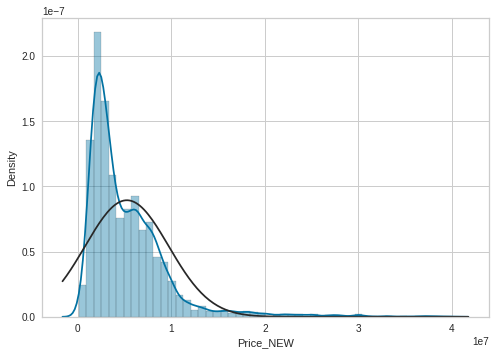

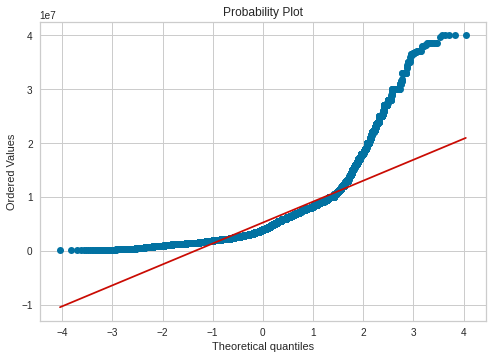

In [ ]:
sns.distplot(df['Price_NEW'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Price_NEW'], plot=plt)

Date cleaning

In [ ]:
df['Year Built / Deliver Year'].dtype

dtype('float64')

In [ ]:
df['Age'] = 2022 - df['Year Built / Deliver Year']

In [ ]:
df['Age'].dtype

dtype('float64')

In [ ]:
df = df[df['Age']<=80]

In [ ]:
df['Age'].describe()

count    24963.000000
mean         3.089773
std          8.470046
min         -8.000000
25%         -1.000000
50%          1.000000
75%          6.000000
max         77.000000
Name: Age, dtype: float64

In [ ]:
df.loc[df['Age'].isna()]

,Floor,Room,Baths,Finish Type,Listing ID,Year Built / Deliver Year,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
df['Age']

1        -4
3         3
5        -8
7        -4
9        -1
         ..
41604     1
41606     3
41607    -3
41608     0
41609    17
Name: Age, Length: 24963, dtype: int64

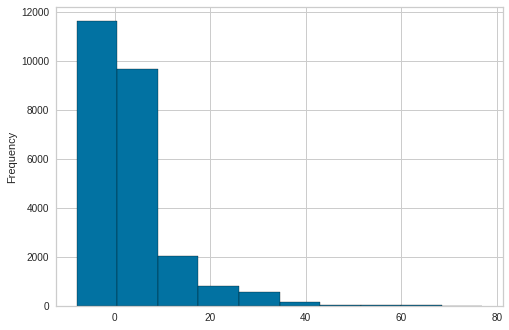

In [ ]:
df['Age'].plot(kind='hist', edgecolor='black')


In [ ]:
import plotly.express as px
age_counts = df["Age"].value_counts()


fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [ ]:
df.drop('Year Built / Deliver Year', axis=1, inplace=True)

Number of Rooms

In [ ]:
print(df['Room'].unique())

['3' '2' '5' '1' '4' '6' '7' '9' ' label.rooms.plus10' '20' '8' '14' '10'
 '12' '16' '17' nan '13' '33' '32' '11' '30' ' 15th' '18' '37' '180' '15th'
 '44' '216' 'label.rooms.plus10']


In [ ]:
df.loc[df['Room'].isna()]

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age
1197,8,NaN,NaN,EXTRA_SUPER_LUX,EG-3330151,Garden,140,Agent,Cash,Apartment,El-Andalus St. Merryland,3000060,12
1211,9,NaN,NaN,SUPER_LUX,EG-3575869,NaN,175,Agent,Cash,Apartment,Zakareya Ghoneim St Ibrahimia,1849925,10
1213,3,NaN,NaN,SUPER_LUX,EG-3569734,Seaview,143,Property Owner,Cash or Installments,Apartment,the address North Coast,25442703,1
2019,3,NaN,NaN,WITHOUT_FINISH,EG-3579930,Main Street,70,Agent,Cash,Apartment,Street 20 Area 3,650020,17
2256,0,NaN,NaN,WITHOUT_FINISH,EG-3592737,Main Street,350,Developer,Cash or Installments,Apartment,Sixteenth Sheikh Zayed El Sheikh Zayed City,949900,9
2388,0,NaN,NaN,SEMI_FINISHED,EG-3586973,NaN,270,Developer,Cash,Villa,Compounds In El Sheikh Zayed Compounds in She...,5000130,8
2886,10,NaN,NaN,SUPER_LUX,EG-3522474,NaN,181,Agent,Cash or Installments,Apartment,Azarita sub-Fifth Settlements ofAlexandria,3149943,11
5418,0,NaN,NaN,SUPER_LUX,EG-3502816,Main Street,151,Property Owner,Cash,Apartment,Saint Jean Street Alexandria,1999995,6
5489,11,NaN,NaN,EXTRA_SUPER_LUX,EG-354104,NaN,141,Property Owner,Cash,Apartment,El-Nasr St. Smouha,2620344,-2
5491,5,NaN,NaN,SUPER_LUX,EG-3540921,NaN,198,Agent,Cash,Apartment,El-Nasr St. Smouha,3934656,-2


In [ ]:
df.loc[ df['Room'] == ' label.rooms.plus10', 'Room'] = '10'
df.loc[ df['Room'] == 'label.rooms.plus10', 'Room'] = '10'

In [ ]:
df.loc[ df['Room'] == '.+3.', 'Room'] = '3'
df.loc[ df['Room'] == ' 15th', 'Room'] = '15'
df.loc[ df['Room'] == '15th', 'Room'] = '15'

In [ ]:
df = df.drop(df[df['Room']=='180'].index)
df = df.drop(df[df['Listing ID']==' EG-3584724'].index)

In [ ]:
df['Room']= df['Room'].fillna(df['Room'].median())

In [ ]:
df['Room'].dtype

dtype('O')

In [ ]:
df['Room'] = df['Room'].astype(int)

In [ ]:
df = df[df['Room']<=20]

In [ ]:
df['Room'].describe()

count    24950.000000
mean         3.526172
std          1.331207
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: Room, dtype: float64

Number of Bathrooms

In [ ]:
print(df['Baths'].unique())

['2' '1' '3' '4' '5' '6' '8' ' label.rooms.plus10' '9' '14' '7' '10' '12'
 '16' '13' nan '11' ' 15th' '43' '1394' 'label.rooms.plus10' '22' '18'
 '15th' '1000']


In [ ]:
df.loc[df['Baths']=='label.rooms.plus10']

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age
13628,Ground,5,label.rooms.plus10,EXTRA_SUPER_LUX,EG-3416228,Main Street,780,Property Owner,Cash or Installments,Penthouse,"Sheikh Zayed 2, Seventh Zone",8999640,4
24418,0,7,label.rooms.plus10,SEMI_FINISHED,EG-3427274,Garden,1100,Developer,Cash or Installments,Villa,New Cairo,4710200,-2
32483,0,6,label.rooms.plus10,SEMI_FINISHED,EG-3554759,Garden,820,Developer,Cash,Villa,Sheikh Zayed,11499680,2
34345,0,7,label.rooms.plus10,SEMI_FINISHED,EG-3436503,Main Street,450,Property Owner,Installments,Twin House,Sheikh Zayed,5499900,5
34603,0,5,label.rooms.plus10,SEMI_FINISHED,EG-3439035,Main Street,526,Property Owner,Cash,Villa,Sheikh Zayed,6000082,0
35037,0,10,label.rooms.plus10,EXTRA_SUPER_LUX,EG-3581292,Side Street,534,Agent,Cash,Villa,Sheikh Zayed,16999890,8
35201,0,10,label.rooms.plus10,SEMI_FINISHED,EG-3436495,Main Street,1400,Agent,Cash or Installments,Villa,Sheikh Zayed,17000200,7
35240,0,7,label.rooms.plus10,EXTRA_SUPER_LUX,EG-3561879,Garden,568,Agent,NaN,Villa,Sheikh Zayed,15999992,4


In [ ]:
df.loc[ df['Baths'] == ' 15th', 'Baths'] = '15'
df.loc[ df['Baths'] == '15th', 'Baths'] = '15'

In [ ]:
df = df.drop(df[df['Baths']==' label.rooms.plus10'].index)
df = df.drop(df[df['Listing ID']=='EG-3427274'].index)
df = df.drop(df[df['Baths']=='label.rooms.plus10'].index)


In [ ]:
df['Baths']= df['Baths'].fillna(df['Baths'].median())

In [ ]:
df['Baths'] = df['Baths'].astype(int)

In [ ]:
df = df[df['Baths']<=10]
df = df[df['Baths']>0]

In [ ]:
df['Baths'].describe()

count    24903.000000
mean         3.030559
std          1.314581
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Baths, dtype: float64

#ENCODING



Doing enconding for categorical values in the dataset

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 
df['seller_LE']= label_encoder.fit_transform(df['Seller Role'])
df['type_LE']= label_encoder.fit_transform(df['Building Type'])
df['finish_type_LE']= label_encoder.fit_transform(df['Finish Type'])
df['view_LE']= label_encoder.fit_transform(df['View'])
df['payement_LE']= label_encoder.fit_transform(df['Payment Method'])

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age,seller_LE,type_LE,finish_type_LE,view_LE,payement_LE
1,5,3,2,SUPER_LUX,EG-3550112,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts,4390056,-4,1,3,3,1,1
3,1,2,1,WITHOUT_FINISH,EG-2811128,Seaview,100,Developer,Installments,Chalet,North Coast,2975000,3,1,3,4,7,2
5,1,2,1,SUPER_LUX,EG-3548407,Seaview,97,Agent,Cash or Installments,Chalet,North Coast Ain Ain Sokhna Ain Sokhna resorts,2179978,-8,0,3,3,7,1
7,1,3,2,SUPER_LUX,EG-3556025,Seaview,135,Developer,Cash or Installments,Chalet,Blue Blue - MG Ain Sokhna resorts,2903985,-4,1,3,3,7,1
9,1,2,1,SUPER_LUX,EG-3551485,Other,125,Agent,Cash or Installments,Chalet,Masaya Resort - Egygab North Coast Resorts,2895000,-1,0,3,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604,1,3,3,SEMI_FINISHED,EG-3534421,Corner,220,Property Owner,Cash,Apartment,Mokattam,1950080,1,2,1,2,0,0
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,Side Street,130,Property Owner,Cash,Apartment,Mokattam,1850030,3,2,1,0,8,0
41607,5,5,2,SEMI_FINISHED,EG-2816095,Main Street,201,Property Owner,Cash,Apartment,Mokattam,1507500,-3,2,1,2,3,0
41608,6,3,3,SUPER_LUX,EG-3583570,Other,190,Developer,Cash or Installments,Apartment,Mokattam,1699930,0,1,1,3,5,1


#Address


extracting the area



In [ ]:
areas = ["New Cairo", "Fifth Settlement", "North Coast", "Sheikh Zayed", "Heliopolis", "Smouha", "Nasr City", "Dokki", "Sherouk", "Giza", "6th of October", "Mokattam", "Zamalek", "New Alamein", "Maadi", "Alexandria", "Manial", "Mohandessin","Greater Cairo", "New Administrative Capital" , "Gouna", "Ain Sokhna","Hurghada","Obour","Tanta","Mansoura","Assuit"]

In [ ]:
df['Address']

1             Hyde Park North Coast North Coast Resorts
3                                           North Coast
5         North Coast Ain Ain Sokhna Ain Sokhna resorts
7                     Blue Blue - MG Ain Sokhna resorts
9            Masaya Resort - Egygab North Coast Resorts
                              ...                      
41604                                          Mokattam
41606                                          Mokattam
41607                                          Mokattam
41608                                          Mokattam
41609                                          Mokattam
Name: Address, Length: 24903, dtype: object

In [ ]:
df["Address"] = df["Address"].astype(str)

In [ ]:
df["new_address"] = df.apply(lambda col: [area for area in areas if area in col["Address"]], axis=1)

In [ ]:
df[["new_address", "Address"]]

,new_address,Address
1,[North Coast],Hyde Park North Coast North Coast Resorts
3,[North Coast],North Coast
5,"[North Coast, Ain Sokhna]",North Coast Ain Ain Sokhna Ain Sokhna resorts
7,[Ain Sokhna],Blue Blue - MG Ain Sokhna resorts
9,[North Coast],Masaya Resort - Egygab North Coast Resorts
...,...,...
41604,[Mokattam],Mokattam
41606,[Mokattam],Mokattam
41607,[Mokattam],Mokattam
41608,[Mokattam],Mokattam


In [ ]:
print(df['new_address'])

count = 0
for i in df['new_address']:
    if i == []:
        count+=1



1                    [North Coast]
3                    [North Coast]
5        [North Coast, Ain Sokhna]
7                     [Ain Sokhna]
9                    [North Coast]
                   ...            
41604                   [Mokattam]
41606                   [Mokattam]
41607                   [Mokattam]
41608                   [Mokattam]
41609                   [Mokattam]
Name: new_address, Length: 24903, dtype: object


In [ ]:
count

212

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age,seller_LE,type_LE,finish_type_LE,view_LE,payement_LE,new_address
1,5,3,2,SUPER_LUX,EG-3550112,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts,4390056,-4,1,3,3,1,1,[North Coast]
3,1,2,1,WITHOUT_FINISH,EG-2811128,Seaview,100,Developer,Installments,Chalet,North Coast,2975000,3,1,3,4,7,2,[North Coast]
5,1,2,1,SUPER_LUX,EG-3548407,Seaview,97,Agent,Cash or Installments,Chalet,North Coast Ain Ain Sokhna Ain Sokhna resorts,2179978,-8,0,3,3,7,1,"[North Coast, Ain Sokhna]"
7,1,3,2,SUPER_LUX,EG-3556025,Seaview,135,Developer,Cash or Installments,Chalet,Blue Blue - MG Ain Sokhna resorts,2903985,-4,1,3,3,7,1,[Ain Sokhna]
9,1,2,1,SUPER_LUX,EG-3551485,Other,125,Agent,Cash or Installments,Chalet,Masaya Resort - Egygab North Coast Resorts,2895000,-1,0,3,3,5,1,[North Coast]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604,1,3,3,SEMI_FINISHED,EG-3534421,Corner,220,Property Owner,Cash,Apartment,Mokattam,1950080,1,2,1,2,0,0,[Mokattam]
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,Side Street,130,Property Owner,Cash,Apartment,Mokattam,1850030,3,2,1,0,8,0,[Mokattam]
41607,5,5,2,SEMI_FINISHED,EG-2816095,Main Street,201,Property Owner,Cash,Apartment,Mokattam,1507500,-3,2,1,2,3,0,[Mokattam]
41608,6,3,3,SUPER_LUX,EG-3583570,Other,190,Developer,Cash or Installments,Apartment,Mokattam,1699930,0,1,1,3,5,1,[Mokattam]


In [ ]:
df['new_address'] = df['new_address'].astype(str)

In [ ]:
df['new_address'].dtype

dtype('O')

In [ ]:
df['new_address'] = [e.split(',')[0]+"]" if ',' in e else e for e in df['new_address']]

In [ ]:
print(df['new_address'].unique())

["['North Coast']" "['Ain Sokhna']" "['New Alamein']"
 "['New Administrative Capital']" "['6th of October']" "['Sheikh Zayed']"
 "['New Cairo']" "['Sherouk']" "['Fifth Settlement']" "['Heliopolis']"
 "['Smouha']" "['Obour']" "['Giza']" "['Alexandria']" "['Nasr City']"
 "['Mokattam']" '[]' "['Mansoura']" "['Assuit']" "['Maadi']" "['Hurghada']"
 "['Dokki']" "['Mohandessin']" "['Greater Cairo']" "['Manial']" "['Tanta']"
 "['Gouna']" "['Zamalek']"]


In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age,seller_LE,type_LE,finish_type_LE,view_LE,payement_LE,new_address
1,5,3,2,SUPER_LUX,EG-3550112,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts,4390056,-4,1,3,3,1,1,['North Coast']
3,1,2,1,WITHOUT_FINISH,EG-2811128,Seaview,100,Developer,Installments,Chalet,North Coast,2975000,3,1,3,4,7,2,['North Coast']
5,1,2,1,SUPER_LUX,EG-3548407,Seaview,97,Agent,Cash or Installments,Chalet,North Coast Ain Ain Sokhna Ain Sokhna resorts,2179978,-8,0,3,3,7,1,['North Coast']
7,1,3,2,SUPER_LUX,EG-3556025,Seaview,135,Developer,Cash or Installments,Chalet,Blue Blue - MG Ain Sokhna resorts,2903985,-4,1,3,3,7,1,['Ain Sokhna']
9,1,2,1,SUPER_LUX,EG-3551485,Other,125,Agent,Cash or Installments,Chalet,Masaya Resort - Egygab North Coast Resorts,2895000,-1,0,3,3,5,1,['North Coast']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604,1,3,3,SEMI_FINISHED,EG-3534421,Corner,220,Property Owner,Cash,Apartment,Mokattam,1950080,1,2,1,2,0,0,['Mokattam']
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,Side Street,130,Property Owner,Cash,Apartment,Mokattam,1850030,3,2,1,0,8,0,['Mokattam']
41607,5,5,2,SEMI_FINISHED,EG-2816095,Main Street,201,Property Owner,Cash,Apartment,Mokattam,1507500,-3,2,1,2,3,0,['Mokattam']
41608,6,3,3,SUPER_LUX,EG-3583570,Other,190,Developer,Cash or Installments,Apartment,Mokattam,1699930,0,1,1,3,5,1,['Mokattam']


In [ ]:
df.drop(df.loc[df['new_address']=='[]'].index, inplace=True)

new address encoding

In [ ]:
df['Address_LE']= label_encoder.fit_transform(df['new_address'])

In [ ]:
print(df['Address_LE'].unique())

[20  1 18 17  0 22 19 23  5  9 24 21  6  2 16 15 13  3 11 10  4 14  8 12 25
  7 26]


In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age,seller_LE,type_LE,finish_type_LE,view_LE,payement_LE,new_address,Address_LE
1,5,3,2,SUPER_LUX,EG-3550112,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts,4390056,-4,1,3,3,1,1,['North Coast'],20
3,1,2,1,WITHOUT_FINISH,EG-2811128,Seaview,100,Developer,Installments,Chalet,North Coast,2975000,3,1,3,4,7,2,['North Coast'],20
5,1,2,1,SUPER_LUX,EG-3548407,Seaview,97,Agent,Cash or Installments,Chalet,North Coast Ain Ain Sokhna Ain Sokhna resorts,2179978,-8,0,3,3,7,1,['North Coast'],20
7,1,3,2,SUPER_LUX,EG-3556025,Seaview,135,Developer,Cash or Installments,Chalet,Blue Blue - MG Ain Sokhna resorts,2903985,-4,1,3,3,7,1,['Ain Sokhna'],1
9,1,2,1,SUPER_LUX,EG-3551485,Other,125,Agent,Cash or Installments,Chalet,Masaya Resort - Egygab North Coast Resorts,2895000,-1,0,3,3,5,1,['North Coast'],20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604,1,3,3,SEMI_FINISHED,EG-3534421,Corner,220,Property Owner,Cash,Apartment,Mokattam,1950080,1,2,1,2,0,0,['Mokattam'],15
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,Side Street,130,Property Owner,Cash,Apartment,Mokattam,1850030,3,2,1,0,8,0,['Mokattam'],15
41607,5,5,2,SEMI_FINISHED,EG-2816095,Main Street,201,Property Owner,Cash,Apartment,Mokattam,1507500,-3,2,1,2,3,0,['Mokattam'],15
41608,6,3,3,SUPER_LUX,EG-3583570,Other,190,Developer,Cash or Installments,Apartment,Mokattam,1699930,0,1,1,3,5,1,['Mokattam'],15


#Regression principles

Checking for multicollinearity

In [ ]:
c = [
      'seller_LE',
     'type_LE',
     'finish_type_LE', 
     'view_LE',
      'Area', 
     'Age',
     'Room',
     'Baths', 
     'payement_LE',
    'Address_LE'
     ]
x=df[c]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [ ]:
vif_data

,feature,VIF
0,seller_LE,1.627750
1,type_LE,3.512950
2,finish_type_LE,3.245770
3,view_LE,2.746610
4,Area,9.470507
5,Age,1.217395
6,Room,20.858374
7,Baths,18.058853
8,payement_LE,1.840629
9,Address_LE,4.918165


In [ ]:
y=df['Price_NEW']

In [ ]:
regr= LinearRegression()
x_tr, x_te, y_tr, y_te = train_test_split(x, y,test_size=0.2,random_state = 4)
regr.fit(x_tr,y_tr)

LinearRegression()

In [ ]:
y_pred = regr.predict(x_te)

In [ ]:
error= y_te-y_pred

In [ ]:
np.round(np.sum(error),2),np.round(np.mean(error),2)

(326592150.31999999, 66018.220000000001)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

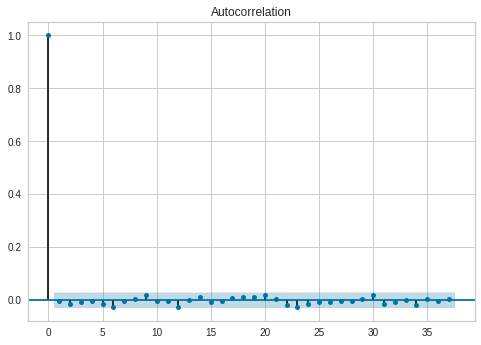

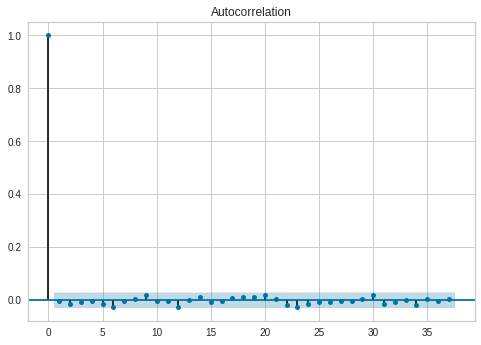

In [ ]:
plot_acf(error)

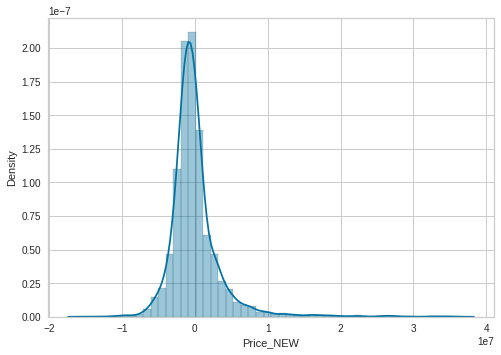

In [ ]:
sns.distplot(error)

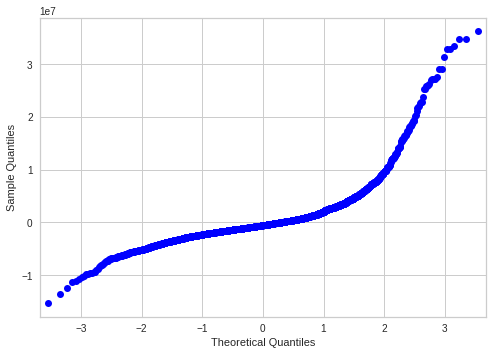

In [ ]:
import statsmodels.api as sm
sm.qqplot(error)
plt.show()

In [ ]:
#plt.plot(y_pred,error,'bo')
#plt.axhline(y=0)

# LINEAR REG

In [ ]:
c = [
    'seller_LE',
     'type_LE',
     'finish_type_LE', 
     'view_LE',
      'Area', 
     'Age',
     'Room',
     'Baths', 
     'payement_LE',
     'Address_LE'
     ]
x=df[c]

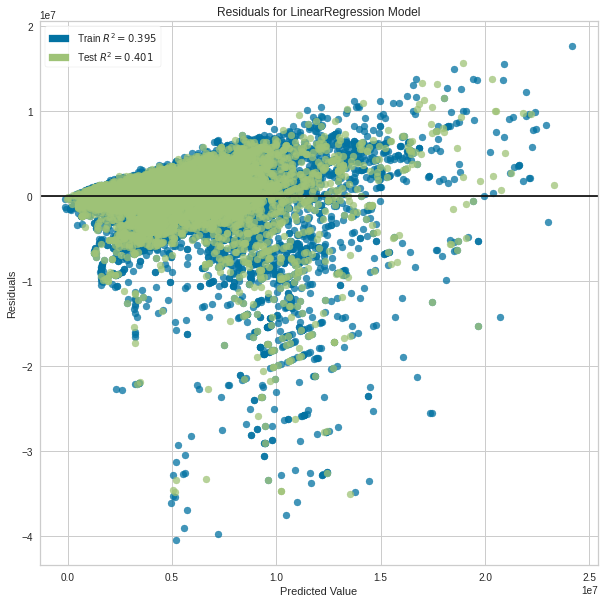

In [ ]:
regr = LinearRegression()

y=df['Price_NEW']



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


f, ax = plt.subplots(figsize=(10, 10))
visualizer = ResidualsPlot(regr, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

y_pred = visualizer.predict(X_test)

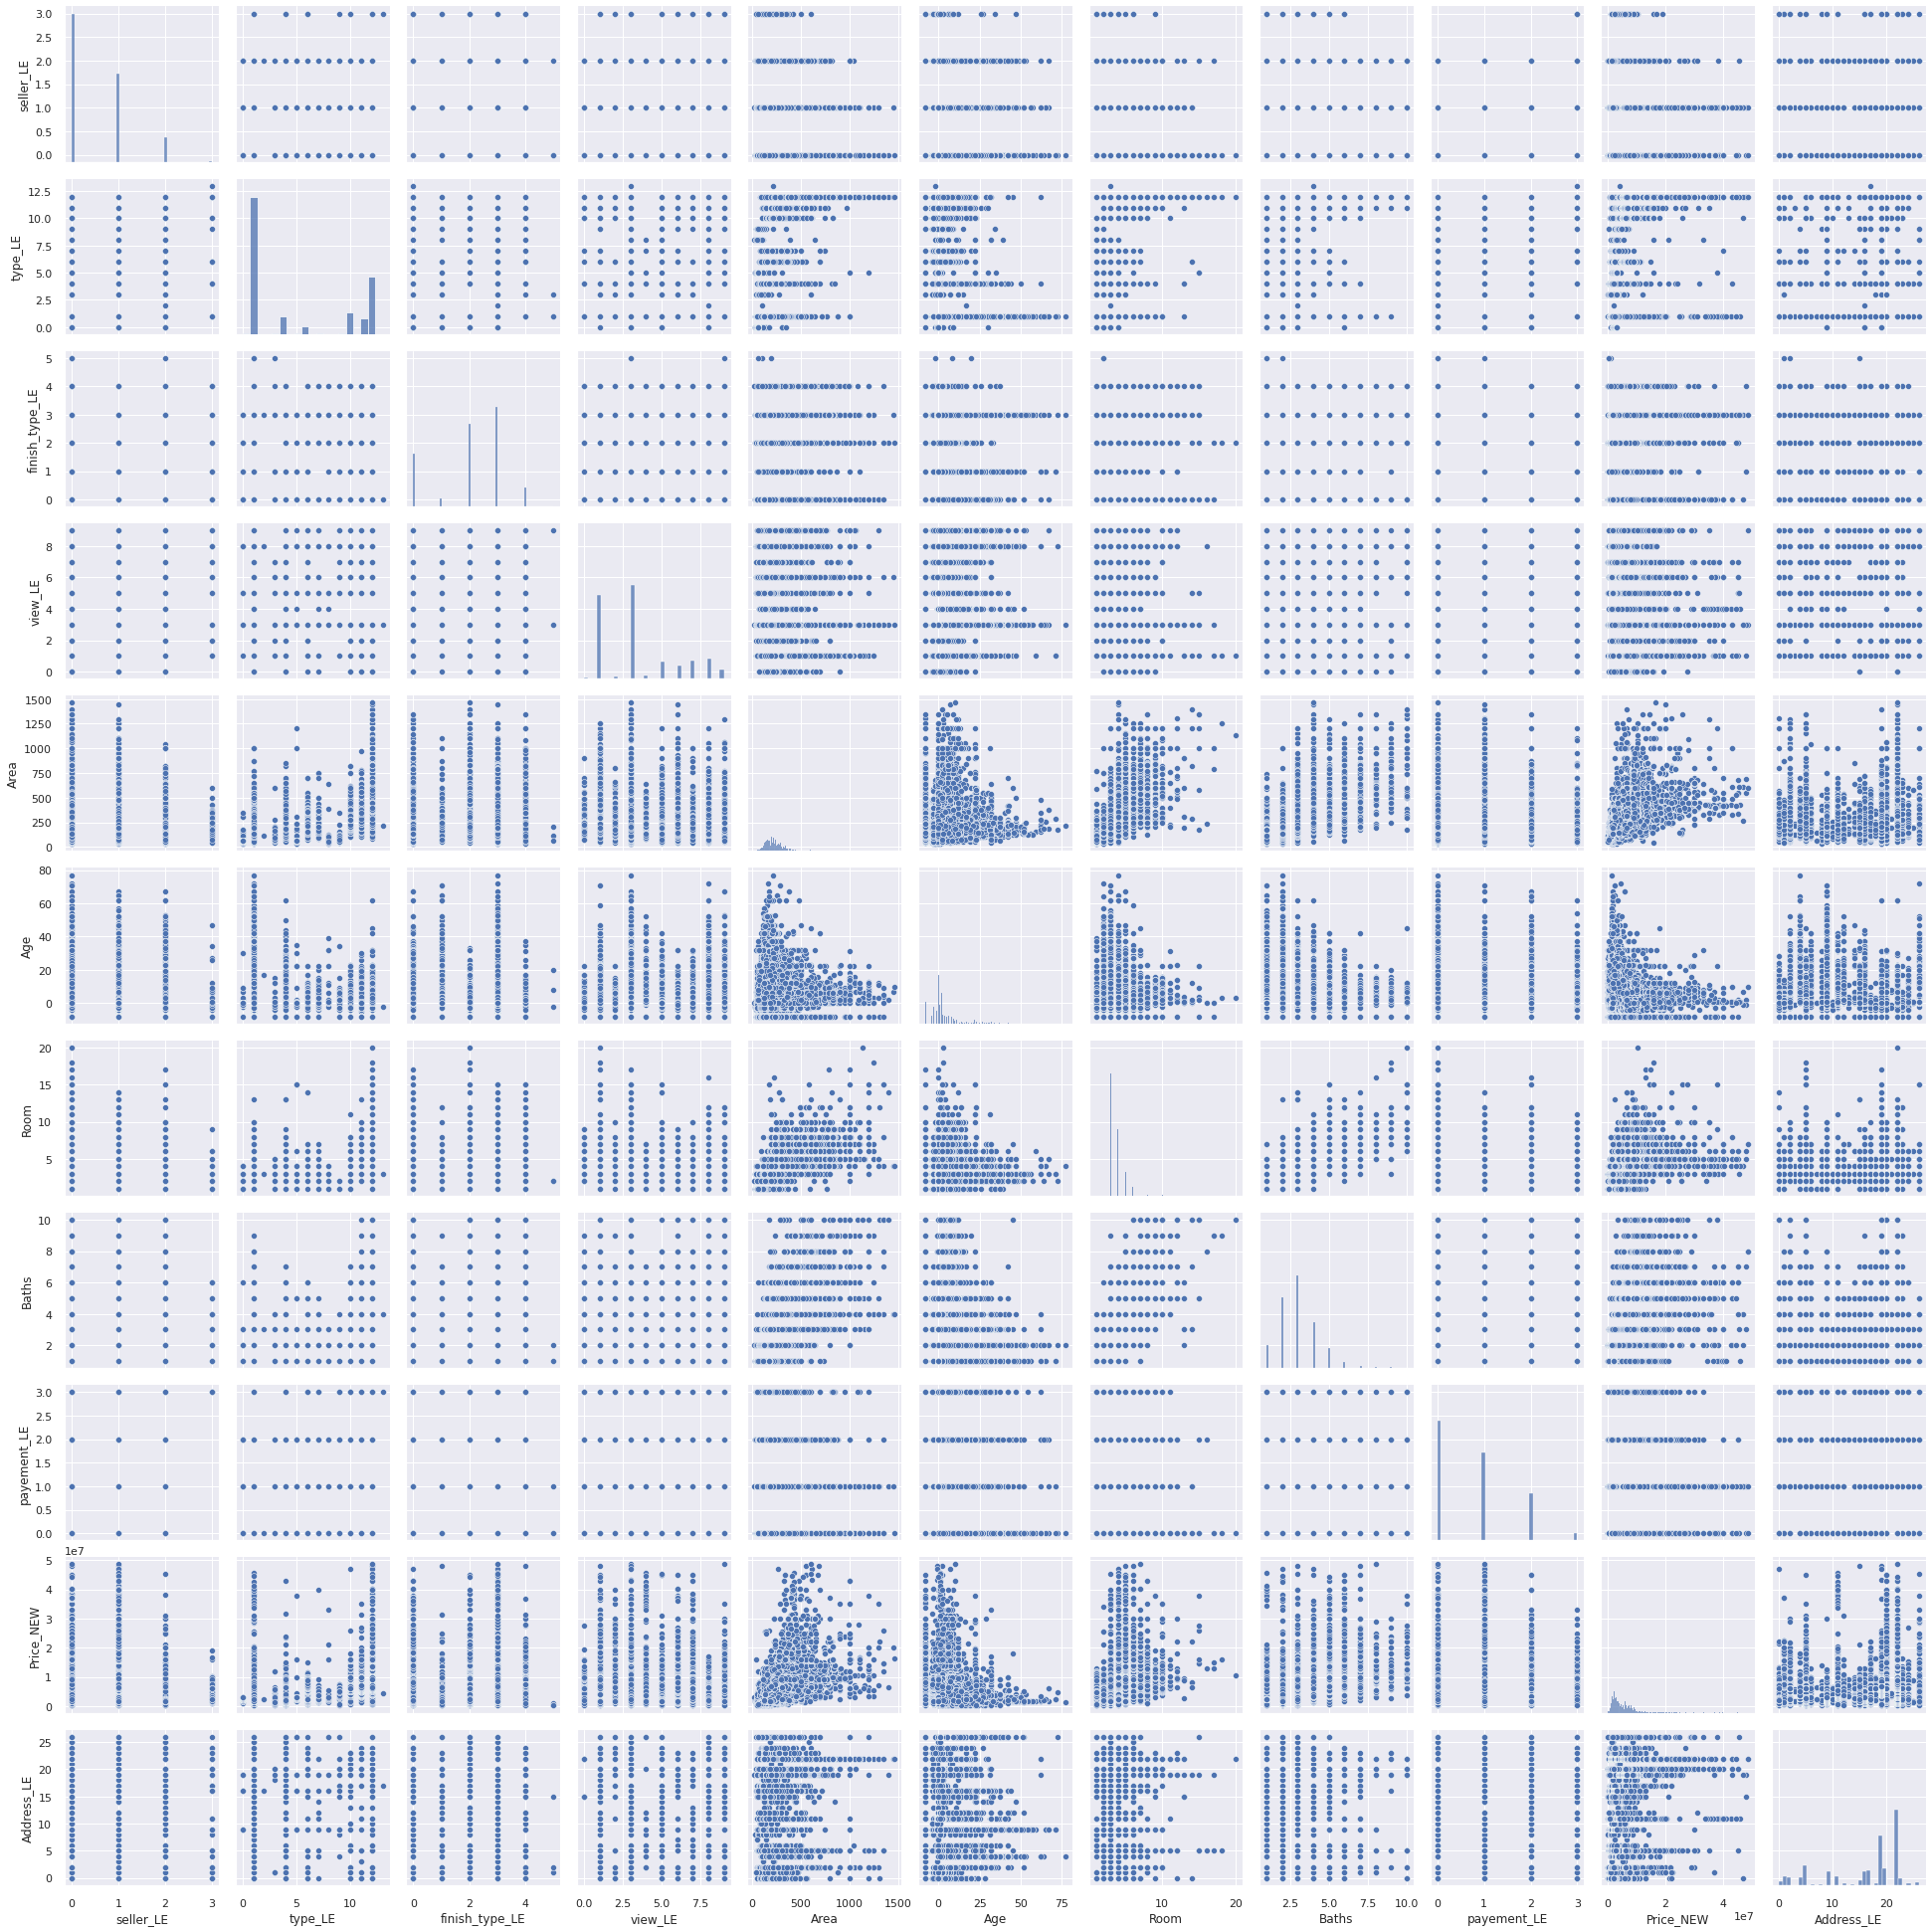

In [ ]:
sns.set()
cols = ['seller_LE', 'type_LE', 'finish_type_LE', 'view_LE', 'Area', 'Age', 'Room', 'Baths', 'payement_LE','Price_NEW','Address_LE']
sns.pairplot(df[cols], height = 2.5)
# sns.pairplot(df[cols])
plt.show();

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.24617779118526117

In [ ]:
n= len(X_train)
p= len(x.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))

adj_R2

0.2456070500496228

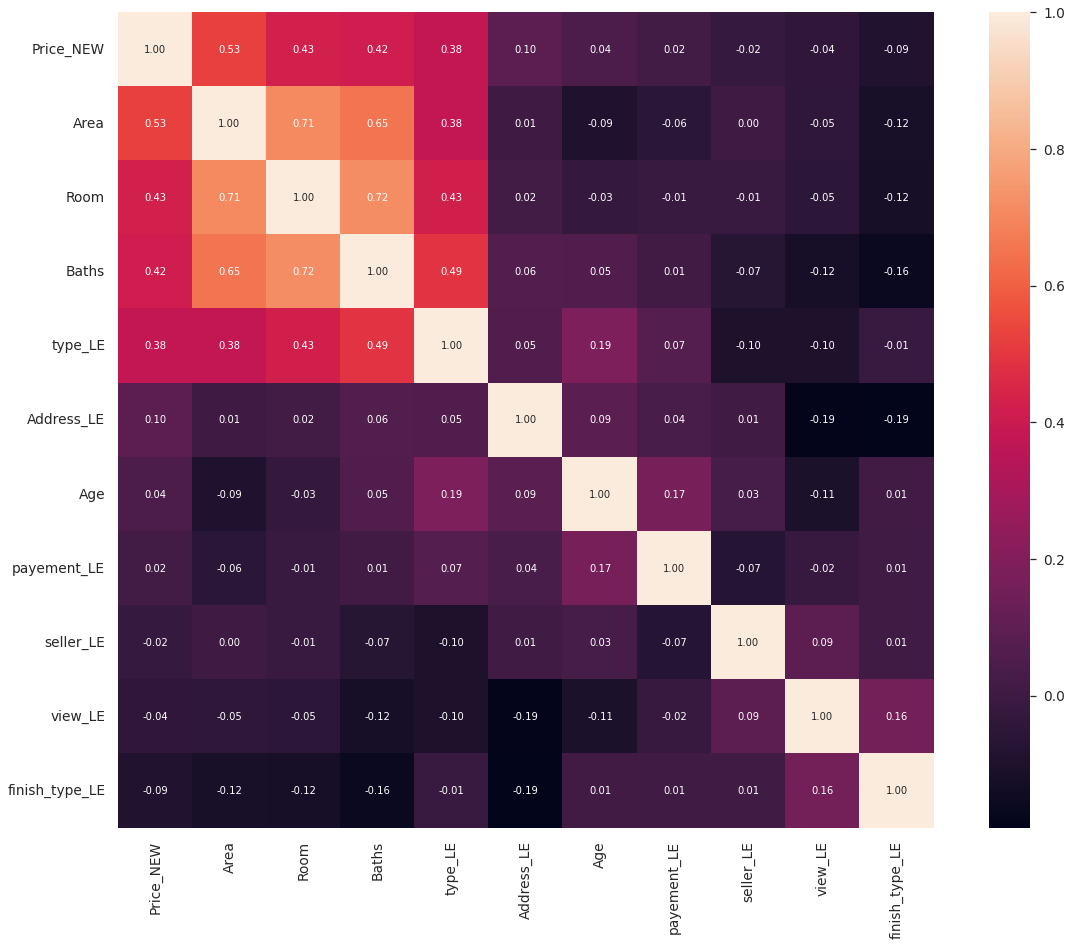

In [ ]:
corrmat = df.corr()
#price correlation matrix
k = 25 
cols = corrmat.nlargest(k, 'Price_NEW')['Price_NEW'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

importance feature

Feature: 0, Score: -6737.24944
Feature: 1, Score: 1217931.01394
Feature: 2, Score: -283510.74328
Feature: 3, Score: 71288.32038
Feature: 4, Score: 1606624.00122
Feature: 5, Score: -217851.83355
Feature: 6, Score: -78657.68186
Feature: 7, Score: 687177.82180
Feature: 8, Score: 77043.64089
Feature: 9, Score: 241447.54773


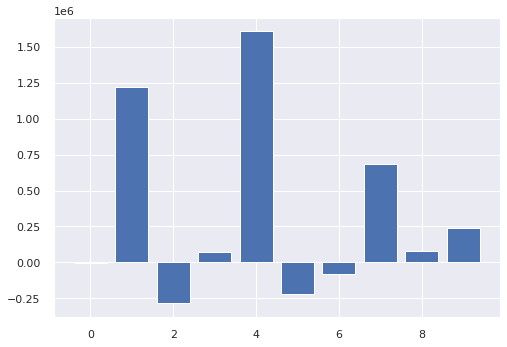

In [ ]:
from matplotlib import pyplot

importance = regr.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [ ]:
c = [
    'seller_LE',
     'type_LE',
     'finish_type_LE', 
     'view_LE',
      'Area', 
     'Age',
     'Room',
     'Baths', 
     'payement_LE',
     'Address_LE'
     ]
x=df[c]

y=df['Price_NEW']



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
y_test=y_test.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [ ]:
X_train =np.array(X_train)
X_test =np.array(X_test)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM
# from keras.callbacks import ModelCheckpoint
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

In [ ]:
# model = Sequential()
# model.add(LSTM(512, input_shape=(8, 1, 10), activation='relu', return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(256, return_sequences=True))
# #model.add(Dropout(0.2))
# model.add(LSTM(256, return_sequences=True))
# #model.add(Dropout(0.2))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(512))
# model.add(Dense(512))
# model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [ ]:
# model.summary()

In [ ]:
# mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# model_history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8, verbose=1, shuffle=False, callbacks=[mc])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)


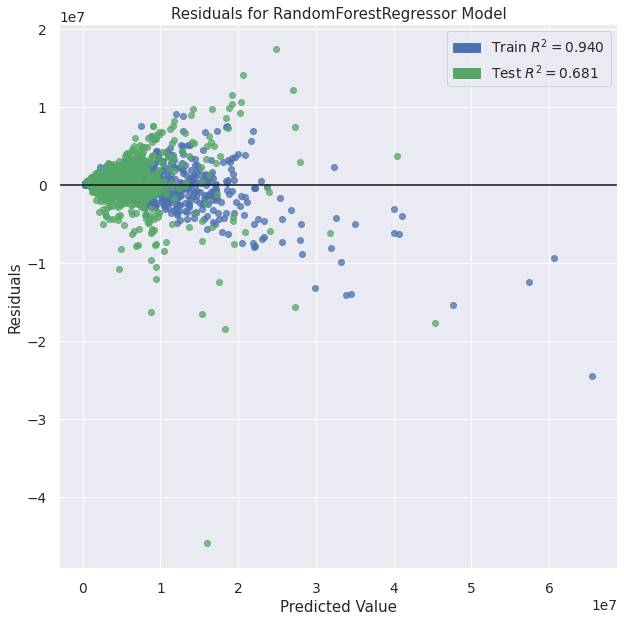

In [ ]:
regr = RandomForestRegressor()
c = ['seller_LE', 'type_LE', 'finish_type_LE', 'view_LE', 'Area', 'Year Built / Deliver Year', 'Room', 'Baths', 'payement_LE']
x=df[c]
y=df['Price_NEW']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


f, ax = plt.subplots(figsize=(10, 10))
visualizer = ResidualsPlot(regr, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

y_pred = visualizer.predict(X_test)

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.68060567336510092

In [ ]:
n= len(X_train)
p= len(x.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))

adj_R2

0.67984480810842696

# light GBM tree

In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

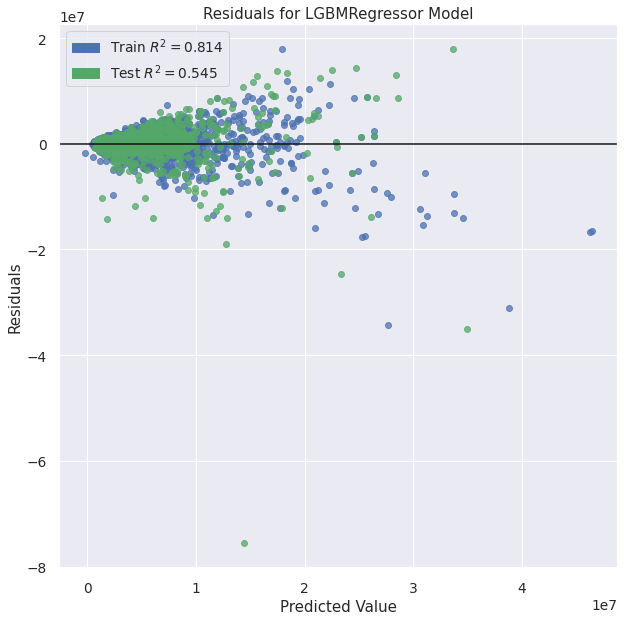

In [ ]:
regr = lgb.LGBMRegressor()
c = ['seller_LE', 'type_LE', 'finish_type_LE', 'view_LE', 'Area', 'Year Built / Deliver Year', 'Room', 'Baths', 'payement_LE']
x=df[c]
y=df['Price_NEW']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


f, ax = plt.subplots(figsize=(10, 10))
visualizer = ResidualsPlot(regr, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

y_pred = visualizer.predict(X_test)

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.54472702965187958

In [ ]:
n= len(X_train)
p= len(x.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))

adj_R2

0.54364247254940912

#Deep Model

In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age,seller_LE,type_LE,finish_type_LE,view_LE,payement_LE,new_address,Address_LE
1,5,3,2,SUPER_LUX,EG-3550112,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts,4390056,-4,1,3,3,1,1,['North Coast'],20
3,1,2,1,WITHOUT_FINISH,EG-2811128,Seaview,100,Developer,Installments,Chalet,North Coast,2975000,3,1,3,4,7,2,['North Coast'],20
5,1,2,1,SUPER_LUX,EG-3548407,Seaview,97,Agent,Cash or Installments,Chalet,North Coast Ain Ain Sokhna Ain Sokhna resorts,2179978,-8,0,3,3,7,1,['North Coast'],20
7,1,3,2,SUPER_LUX,EG-3556025,Seaview,135,Developer,Cash or Installments,Chalet,Blue Blue - MG Ain Sokhna resorts,2903985,-4,1,3,3,7,1,['Ain Sokhna'],1
9,1,2,1,SUPER_LUX,EG-3551485,Other,125,Agent,Cash or Installments,Chalet,Masaya Resort - Egygab North Coast Resorts,2895000,-1,0,3,3,5,1,['North Coast'],20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604,1,3,3,SEMI_FINISHED,EG-3534421,Corner,220,Property Owner,Cash,Apartment,Mokattam,1950080,1,2,1,2,0,0,['Mokattam'],15
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,Side Street,130,Property Owner,Cash,Apartment,Mokattam,1850030,3,2,1,0,8,0,['Mokattam'],15
41607,5,5,2,SEMI_FINISHED,EG-2816095,Main Street,201,Property Owner,Cash,Apartment,Mokattam,1507500,-3,2,1,2,3,0,['Mokattam'],15
41608,6,3,3,SUPER_LUX,EG-3583570,Other,190,Developer,Cash or Installments,Apartment,Mokattam,1699930,0,1,1,3,5,1,['Mokattam'],15


In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age,seller_LE,type_LE,finish_type_LE,view_LE,payement_LE,new_address,Address_LE
1,5,3,2,SUPER_LUX,EG-3550112,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts,4390056,-4,1,3,3,1,1,['North Coast'],20
3,1,2,1,WITHOUT_FINISH,EG-2811128,Seaview,100,Developer,Installments,Chalet,North Coast,2975000,3,1,3,4,7,2,['North Coast'],20
5,1,2,1,SUPER_LUX,EG-3548407,Seaview,97,Agent,Cash or Installments,Chalet,North Coast Ain Ain Sokhna Ain Sokhna resorts,2179978,-8,0,3,3,7,1,['North Coast'],20
7,1,3,2,SUPER_LUX,EG-3556025,Seaview,135,Developer,Cash or Installments,Chalet,Blue Blue - MG Ain Sokhna resorts,2903985,-4,1,3,3,7,1,['Ain Sokhna'],1
9,1,2,1,SUPER_LUX,EG-3551485,Other,125,Agent,Cash or Installments,Chalet,Masaya Resort - Egygab North Coast Resorts,2895000,-1,0,3,3,5,1,['North Coast'],20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604,1,3,3,SEMI_FINISHED,EG-3534421,Corner,220,Property Owner,Cash,Apartment,Mokattam,1950080,1,2,1,2,0,0,['Mokattam'],15
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,Side Street,130,Property Owner,Cash,Apartment,Mokattam,1850030,3,2,1,0,8,0,['Mokattam'],15
41607,5,5,2,SEMI_FINISHED,EG-2816095,Main Street,201,Property Owner,Cash,Apartment,Mokattam,1507500,-3,2,1,2,3,0,['Mokattam'],15
41608,6,3,3,SUPER_LUX,EG-3583570,Other,190,Developer,Cash or Installments,Apartment,Mokattam,1699930,0,1,1,3,5,1,['Mokattam'],15


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import metrics


c = ['seller_LE', 'type_LE', 'finish_type_LE', 'view_LE', 'Area', 'Age', 'Room', 'Baths', 'payement_LE', 'Address_LE']
x=df[c]
y=df['Price_NEW']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)


scaler = StandardScaler().fit (pd.concat([X_train, X_test], axis=0)) 

#X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
#X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)




In [ ]:
df

,Floor,Room,Baths,Finish Type,Listing ID,View,Area,Seller Role,Payment Method,Building Type,Address,Price_NEW,Age,seller_LE,type_LE,finish_type_LE,view_LE,payement_LE,new_address,Address_LE
1,5,3,2,SUPER_LUX,EG-3550112,Garden,132,Developer,Cash or Installments,Chalet,Hyde Park North Coast North Coast Resorts,4390056,-4,1,3,3,1,1,['North Coast'],20
3,1,2,1,WITHOUT_FINISH,EG-2811128,Seaview,100,Developer,Installments,Chalet,North Coast,2975000,3,1,3,4,7,2,['North Coast'],20
5,1,2,1,SUPER_LUX,EG-3548407,Seaview,97,Agent,Cash or Installments,Chalet,North Coast Ain Ain Sokhna Ain Sokhna resorts,2179978,-8,0,3,3,7,1,['North Coast'],20
7,1,3,2,SUPER_LUX,EG-3556025,Seaview,135,Developer,Cash or Installments,Chalet,Blue Blue - MG Ain Sokhna resorts,2903985,-4,1,3,3,7,1,['Ain Sokhna'],1
9,1,2,1,SUPER_LUX,EG-3551485,Other,125,Agent,Cash or Installments,Chalet,Masaya Resort - Egygab North Coast Resorts,2895000,-1,0,3,3,5,1,['North Coast'],20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41604,1,3,3,SEMI_FINISHED,EG-3534421,Corner,220,Property Owner,Cash,Apartment,Mokattam,1950080,1,2,1,2,0,0,['Mokattam'],15
41606,6,3,2,EXTRA_SUPER_LUX,EG-3472762,Side Street,130,Property Owner,Cash,Apartment,Mokattam,1850030,3,2,1,0,8,0,['Mokattam'],15
41607,5,5,2,SEMI_FINISHED,EG-2816095,Main Street,201,Property Owner,Cash,Apartment,Mokattam,1507500,-3,2,1,2,3,0,['Mokattam'],15
41608,6,3,3,SUPER_LUX,EG-3583570,Other,190,Developer,Cash or Installments,Apartment,Mokattam,1699930,0,1,1,3,5,1,['Mokattam'],15


In [ ]:
X_train

,seller_LE,type_LE,finish_type_LE,view_LE,Area,Age,Room,Baths,payement_LE,Address_LE
20303,1,1,3,6,160,32,3,1,0,9
5364,1,1,0,1,141,-3,3,2,1,2
1592,1,1,3,3,158,-8,3,2,2,11
4645,1,1,2,1,250,-2,4,3,1,17
4414,1,1,1,3,57,-2,2,1,1,17
...,...,...,...,...,...,...,...,...,...,...
11370,0,1,3,7,135,-8,4,3,0,1
33918,1,10,2,3,310,9,4,4,1,22
19350,0,1,3,3,200,24,3,2,0,16
10987,0,12,3,5,161,-3,4,4,1,20


In [ ]:
X_train[:5]

XG boost

In [ ]:
# params = {
#     'nthread':[4], 
#     'objective':['reg:linear'],
#     'learning_rate': [.03, 0.05, .07], 
#     'max_depth': [5, 6, 7],
#     'min_child_weight': [4],
#     'silent': [1],
#     'subsample': [0.7],
#     'colsample_bytree': [0.7],
#     'n_estimators': [500,1000]
# }


#best params
params = {
    'nthread':[4], 
    'objective':['reg:linear'],
    'learning_rate': [.03], 
    'max_depth': [20],
    'min_child_weight': [4],
    'silent': [1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [500], 
          }

In [ ]:
regr = XGBRegressor(early_stopping_rounds=10,random_state=2)
regr = GridSearchCV(regr, params, cv=5)
regr.fit(X_train, y_train)
regr.predict(X_test)

array([ 9789292. ,  2585598. ,  3756365.8, ...,  6482735.5,  2995403.5,
        3334080. ], dtype=float32)

light GBM

In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [ ]:
# params = {
#     'boosting_type':['gbdt','dart','gross','rf'],
#     'num_leaves':[31,40,10,128],
#     'max_depth':[-1,8],
#     'learning_rate':[0.1,0.05, 0.005],
#     'metric':['l2','l1'],
#     'objective':['regression'],
#     'min_data_in_leaf':[20],
#     'boosting':['gbdt'],
#     'lambda_l1':[0.0],
#     'categorical_feature':[""],
#     'n_estimators ':[500, 1000]
# }

#Best params
params = { 
    'boosting_type':['gbdt'],
    'num_leaves':[128],
    'max_depth':[-1],
    'learning_rate':[0.1],
    'metric':['l2'],
    'objective':['regression'],
    'min_data_in_leaf':[20],
    'boosting':['gbdt'],
    'lambda_l1':[0.0],
    'categorical_feature':[""],
    'n_estimators ':[500]}

In [ ]:
# regr = lgb.LGBMRegressor(random_state=2)
# regr = GridSearchCV(regr, params, cv=5)
# regr.fit(X_train, y_train)
# regr.predict(X_test)

array([ 8966984.73130968,  7301376.64037428,  1631626.28564419, ...,
        6166894.46977251,  4605935.26081051,  5195155.28659716])

Random Forest

In [ ]:
params = {
    'bootstrap': [True,False],
    'criterion': ['mse','entropy'],
    'max_depth': [50,100],
    'max_features':  [ "sqrt", "log2"],
    'min_samples_split': [8, 12],
    'n_estimators': [100,500],
    'warm_start': [True,False]
     
}

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
  
#  # create regressor object
# regr = RandomForestRegressor(n_estimators = 100, random_state = 0)
# regr = GridSearchCV(regr, params, cv=5)
# regr.fit(X_train, y_train)
# regr.predict(X_test)

array([ 2400681.07404762,  2693749.95467619,  8967382.72853809, ...,
        3510055.05001429,  2556811.39330476,  5871406.33579048])

MLP REGRESSOR neural network

In [ ]:
# params = {
#     "hidden_layer_sizes": 
#       [[50,50], [19,19,19,19,19], [100,100]],
#     "activation": 
#       ['relu', 'sigmoid', 'tanh'],
#     "solver": 
#       ['adam', 'sgd', 'nadam'],
#     "learning_rate_init": 
#       [0.01, 0.2, 0.001, 0.1],
#     "early_stopping": 
#       [True, False]
# }
# params = {
#     "hidden_layer_sizes": [[50,50]],
#     "activation": ['relu', 'sigmoid']
# }

# best params
params = {
    "hidden_layer_sizes": [50,50],
    "activation": ['relu'],
    'early_stopping': [True],
    'learning_rate_init': [0.01],
    'solver': ['adam']
}

In [ ]:
# regr = MLPRegressor(max_iter=1000, random_state = 2)
# regr = GridSearchCV(regr, params, cv=5)
# regr.fit(X_train, y_train)
# regr.predict(X_test)

array([ 9021052.51491248,  7907532.54063409,  2421921.80354123, ...,
        6359459.2779586 ,  8349311.38187216,  5799429.55946858])

Evaluation

In [ ]:
preds = regr.predict(X_test)


In [ ]:
for pred, target in zip(preds,y_test):
  print("Prediction:{} - Target: {}".format(pred,target))

Prediction:9789292.0 - Target: 9999825
Prediction:2585598.0 - Target: 2547740
Prediction:3756365.75 - Target: 7430040
Prediction:10049076.0 - Target: 10000032
Prediction:6233063.0 - Target: 6463100
Prediction:5216450.5 - Target: 4950000
Prediction:3162683.5 - Target: 3200130
Prediction:12133148.0 - Target: 11399085
Prediction:5465559.5 - Target: 4925070
Prediction:3517370.0 - Target: 2200012
Prediction:9671444.0 - Target: 9899890
Prediction:5159597.0 - Target: 5180920
Prediction:2307835.0 - Target: 2200000
Prediction:3725808.0 - Target: 4000085
Prediction:2467237.25 - Target: 2400020
Prediction:7285114.0 - Target: 5000050
Prediction:5082197.0 - Target: 4599886
Prediction:3091116.75 - Target: 2050000
Prediction:4129293.5 - Target: 4100033
Prediction:2380442.25 - Target: 1799982
Prediction:9094332.0 - Target: 9000000
Prediction:1622222.5 - Target: 1700000
Prediction:2399116.5 - Target: 2249984
Prediction:2924040.0 - Target: 2300070
Prediction:2309257.25 - Target: 2200000
Prediction:21960

In [ ]:
scores = regr.score(X_test,y_test)

In [ ]:
scores

0.81799346708471243

In [ ]:
print(regr.best_score_)
print(regr.best_params_)

0.821642737035
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 20, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
preds = regr.predict(X_test)

In [ ]:
print(r2_score(preds, y_test))

0.769766431015


In [ ]:
train_preds = regr.predict(X_train)

In [ ]:
from sklearn.metrics import explained_variance_score

accuracy = explained_variance_score(y_test, preds)

In [ ]:
accuracy

0.81799725644964971

In [ ]:
from sklearn.metrics import max_error

In [ ]:
max_error(y_test, preds)

26147184.0

# Predicting new values

In [ ]:
inputs = [[1, 1, 0, 1,150, 2, 3, 2,0, 6]]

In [ ]:
inputs

[[1, 1, 0, 1, 150, 2, 3, 2, 0, 6]]

In [ ]:
Xnew = pd.DataFrame(inputs)

In [ ]:
Xnew

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,1,150,2,3,2,0,6


In [ ]:
Xnew.columns = ['seller_LE', 'type_LE', 'finish_type_LE', 'view_LE', 'Area', 'Age', 'Room', 'Baths', 'payement_LE', 'Address_LE']

In [ ]:
new  = regr.predict(Xnew)

In [ ]:
new

array([ 3158217.5], dtype=float32)